# PERCEPTRON

##### LOAD THE DATA

In [1]:
import numpy as np

# each row contains Sepal length in cm, Sepal width in nm and type (0|1)
# 0: Iris-setosa | 1: Iris-versicolor
data = np.loadtxt('iris-data.csv', delimiter=',')
data

array([[ 5.1,  3.5,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.6,  3.4,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5. ,  3.6,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5. ,  3.4,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.8,  3. ,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.5,  2.3,  1. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  3.8,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  4.4,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 5.7,  2.8,  1. ],
       [ 4.7,  3.2,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.9,  3.1,  0. ],
       [ 5.2,  2.7,  1. ],
 

##### VISUALIZE THE DATA
It is a good idea to visualize the data so we can confirm that the data is linearly separable.

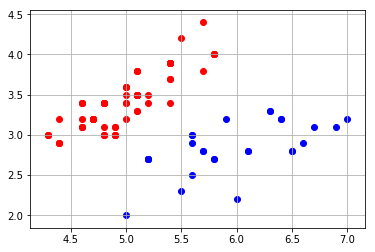

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()

for i in range(len(data)) :
    point = data[i]
    if point[2] == 0 :
        color = 'r'  # setosas will appear in blue
    else:
        color = 'b'  # versicolor will appear in red
    
    plt.scatter(point[0], point[1], c=color);

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= 'https://farm9.staticflickr.com/8383/8675226902_e72273713f_k.jpg', width=350, height=350)

##### DEFINE TRAINING AND TESTING SETS

In [4]:
# split data into training and testing sets
train_data = data[:70]   # 70%
test_data = data[70:]    # 30%

In [5]:
from sklearn.model_selection import train_test_split

target = data[:, -1]
data = data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.30, random_state=42)

X_train.shape

(68, 2)

##### DEFINE THRESHOLD FUNCTION AND ITS DERIVATIVE

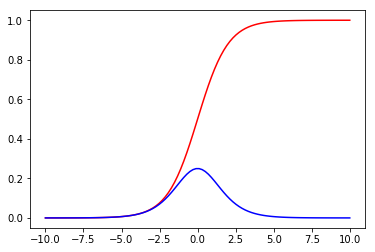

In [6]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

lin = np.linspace(-10, 10, 100)
plt.plot(lin, sigmoid(lin), c='r')
plt.plot(lin, sigmoid_p(lin), c='b');

##### TRAIN THE MODEL

In [7]:
from sklearn.metrics import mean_squared_error

class Perceptron(object):
    def __init__(self, learning=0.1, n_epochs=20, random_state=47):
        self.learning = learning
        self.n_epochs = n_epochs
    
    def model(self, X):
        logit = np.dot(X, self.w_) + self.b_
        return sigmoid(logit)
    
    def fit(self, X, y):
        # iniciate the weights and bias
        self.w_ = np.random.uniform(0, 1, X.shape[1])
        self.b_ = np.random.uniform(0, 1, 1)
        
        self.costList_ = []

        for ep in range(self.n_epochs):
            cost_epoch = 0
            for xi, target in zip(X, y):
                output = self.model(xi)
                
                # cost function
                cost = np.square(target - output)
                cost_epoch += float(cost/len(X))  # MSE
                
                update = self.learning * (target - output)
                
                self.w_ += update * xi
                self.b_ += update
                
            self.costList_.append(cost_epoch)
        return self

    
    def predict(self, X):
        out = self.model(X)
        out = np.round(out)
        return 'Iris-Versicolor' if out else 'Iris-setosa'

In [8]:
clf = Perceptron()
clf.fit(X_train, y_train)
clf.costList_

[0.2757551865279159,
 0.1720170481212632,
 0.11086419874259093,
 0.07866154687397284,
 0.06205734480650503,
 0.05227561433576241,
 0.04571151203196971,
 0.04087502762810813,
 0.03708817536751082,
 0.034004993608102815,
 0.031428166842470295,
 0.02923382136452455,
 0.027338111814976265,
 0.025681073728655236,
 0.0242181212272816,
 0.022915181972147067,
 0.021745696925026033,
 0.020688651059530737,
 0.01972721622627974,
 0.018847781062516087]

##### VISUALIZE MODEL IMPROVEMENT

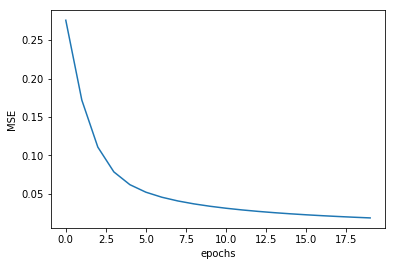

In [9]:
plt.plot(clf.costList_)
plt.xlabel('epochs')
plt.ylabel('MSE');
plt.show()

##### MAKE PREDICTIONS

In [10]:
try_me = [5.5,  2.3]
clf.predict(try_me)

'Iris-Versicolor'